In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
import time
from citipy import citipy

In [26]:
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats,lngs)
coordinates = list(lat_lngs)
cities = []
city_data = []
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
set_count = 1
record_count = 1

In [27]:
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(len(cities))

616


print("Beginning Data Retrieval     ")
print("-----------------------------")


for i, city in enumerate(cities):
    try:
        if (i % 50 == 0 and i >= 50):
            set_count +=1
            record_count +=1
            time.sleep(60)
        city_url = url+"&q="+city.replace(" ","+")
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        record_count +=1     
            # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
            # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date
                            }
                        )

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [31]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,26.37,96,98,5.93,RU,2022-10-12 00:03:21
1,Hobart,-42.8794,147.3294,64.06,70,75,14.97,AU,2022-10-12 00:02:08
2,Avarua,-21.2078,-159.7750,78.85,78,75,20.71,CK,2022-10-12 00:02:14
3,Albany,42.6001,-73.9662,56.23,84,2,4.05,US,2022-10-12 00:00:26
4,Port Elizabeth,-33.9180,25.5701,67.32,87,96,4.00,ZA,2022-10-12 00:03:22
...,...,...,...,...,...,...,...,...,...
557,Cheremukhovo,60.3484,59.9851,39.47,85,76,2.57,RU,2022-10-12 00:19:52
558,Terrenate,19.4833,-97.9167,53.10,86,99,6.15,MX,2022-10-12 00:19:52
559,General Roca,-39.0333,-67.5833,65.62,35,96,28.70,AR,2022-10-12 00:19:53
560,Bahia Blanca,-38.7196,-62.2724,62.65,33,30,9.28,AR,2022-10-12 00:19:54


In [30]:
new_order = ['City','Country','Date','Lat','Lng',"Max Temp",'Humidity','Cloudiness',"Wind Speed"]
city_df = city_data_df[new_order]
city_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-10-12 00:03:21,71.9167,114.0833,26.37,96,98,5.93
1,Hobart,AU,2022-10-12 00:02:08,-42.8794,147.3294,64.06,70,75,14.97
2,Avarua,CK,2022-10-12 00:02:14,-21.2078,-159.7750,78.85,78,75,20.71
3,Albany,US,2022-10-12 00:00:26,42.6001,-73.9662,56.23,84,2,4.05
4,Port Elizabeth,ZA,2022-10-12 00:03:22,-33.9180,25.5701,67.32,87,96,4.00
...,...,...,...,...,...,...,...,...,...
557,Cheremukhovo,RU,2022-10-12 00:19:52,60.3484,59.9851,39.47,85,76,2.57
558,Terrenate,MX,2022-10-12 00:19:52,19.4833,-97.9167,53.10,86,99,6.15
559,General Roca,AR,2022-10-12 00:19:53,-39.0333,-67.5833,65.62,35,96,28.70
560,Bahia Blanca,AR,2022-10-12 00:19:54,-38.7196,-62.2724,62.65,33,30,9.28


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]
today = time.strftime('%x')


In [39]:
today

'10/11/22'

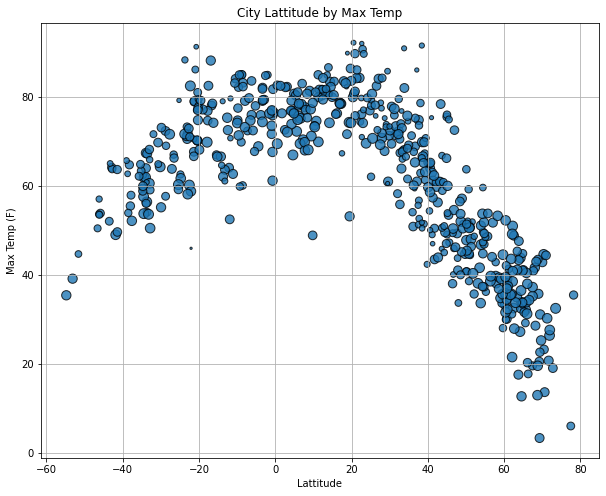

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(lats,max_temps, s=humidity, edgecolors='black',linewidths=1,alpha=.8,label="Cities")
ax.grid(True)
ax.set_title("City Lattitude by Max Temp")
ax.set_xlabel("Lattitude")
ax.set_ylabel('Max Temp (F)')
# plt.savefig('weather_data/figure1.png')


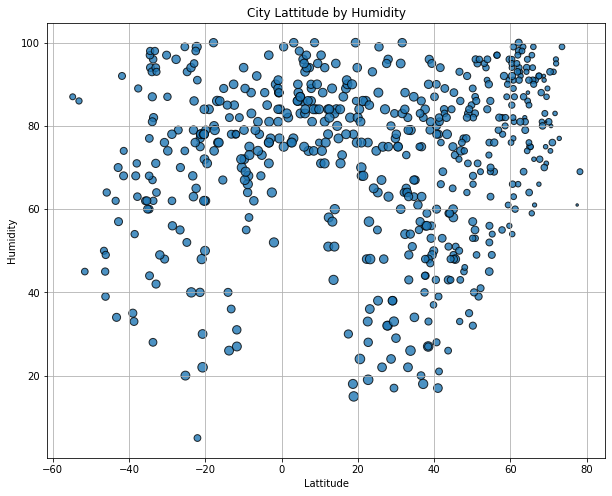

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(lats,humidity, s=max_temps, edgecolors='black',linewidths=1,alpha=.8,label="Cities")
ax.grid(True)
ax.set_title("City Lattitude by Humidity")
ax.set_xlabel("Lattitude")
ax.set_ylabel('Humidity')
# plt.savefig('weather_data/figure2.png')

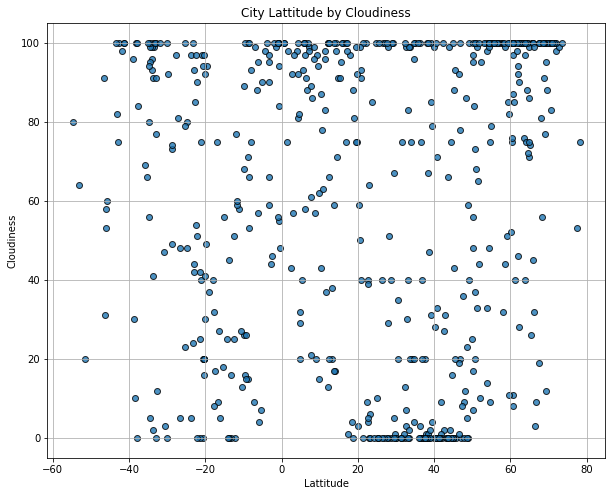

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(lats,cloudiness, edgecolors='black',linewidths=1,alpha=.8,label="Cities")
ax.grid(True)
ax.set_title("City Lattitude by Cloudiness")
ax.set_xlabel("Lattitude")
ax.set_ylabel('Cloudiness')
plt.savefig('weather_data/figure3.png')

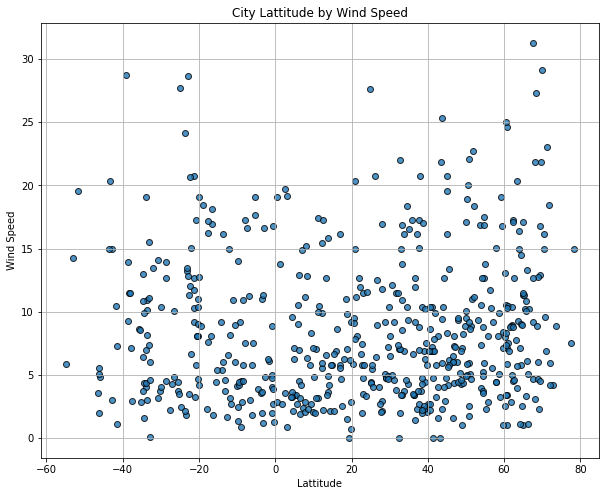

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(lats,wind_speed, edgecolors='black',linewidths=1,alpha=.8,label="Cities")
ax.grid(True)
ax.set_title("City Lattitude by Wind Speed")
ax.set_xlabel("Lattitude")
ax.set_ylabel('Wind Speed')
# plt.savefig('weather_data/figure4.png')